In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
Data = pd.read_csv('F:/Kaggle/Medical Cost Personal/insurance.csv')
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
Data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
Data.shape

(1338, 7)

In [7]:
Data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
Data.sex = Data['sex'].astype("category")
Data.smoker = Data['smoker'].astype("category")
Data.region = Data['region'].astype("category")
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [9]:
Data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

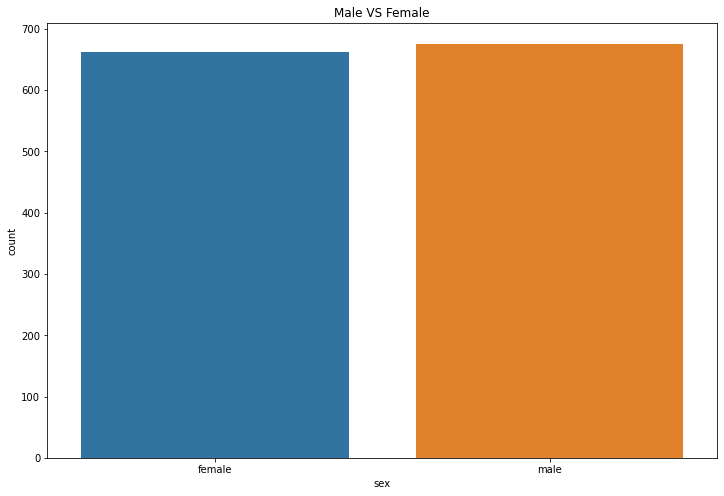

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x='sex',data = Data)
plt.title("Male VS Female")
plt.show()

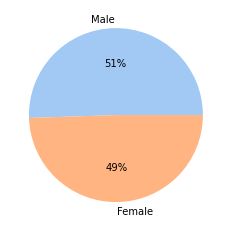

In [11]:
Sex_valuecount = Data['sex'].value_counts(normalize=True)*100
Label = ['Male','Female']
colors = sns.color_palette('pastel')
plt.pie(Sex_valuecount ,labels = Label ,colors=colors , autopct = '%0.0f%%')
plt.show()

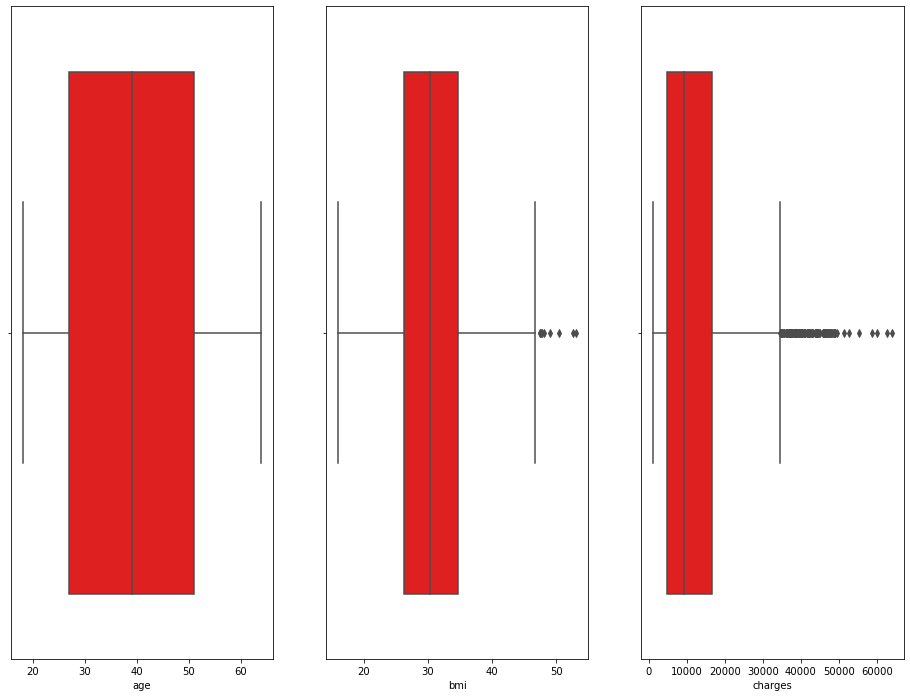

In [12]:
#Checking outliers
Fig , axes = plt.subplots(figsize=(16,12),nrows=1, ncols=3)
sns.boxplot(Data.age , color = 'red' , ax = axes[0])

sns.boxplot(Data.bmi , color = 'red' , ax = axes[1])

sns.boxplot(Data.charges , color = 'red' , ax = axes[2])
plt.show()

In [13]:
Data.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

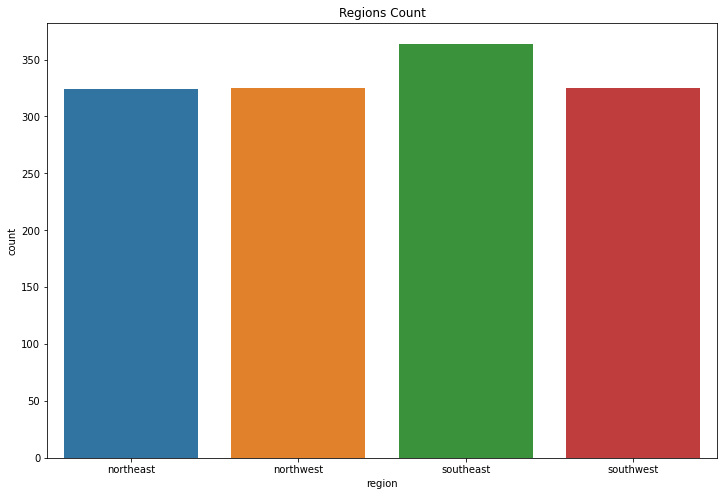

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x='region',data = Data)
plt.title("Regions Count")
plt.show()

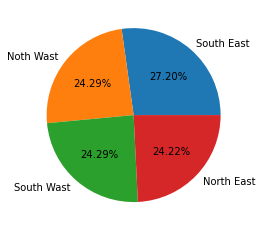

In [15]:
Region_valuecount = Data['region'].value_counts(normalize=True)*100
Label = ['South East','Noth Wast','South Wast','North East']
colors = sns.color_palette()
plt.pie(Region_valuecount ,labels = Label ,colors=colors , autopct = '%0.02f%%')
plt.show()

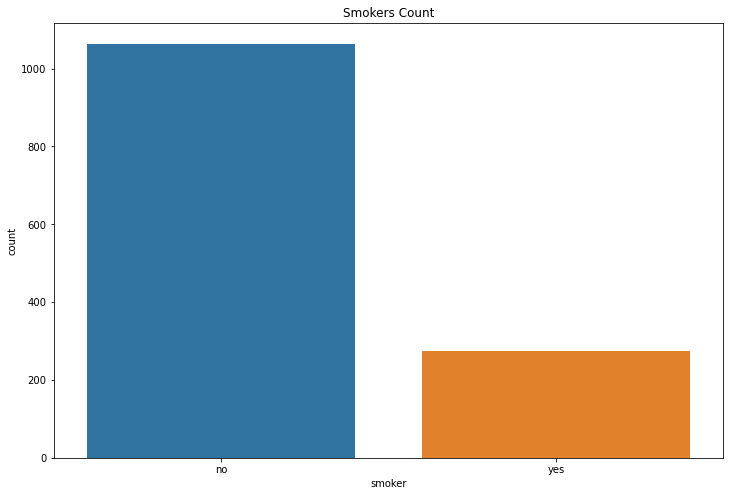

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x='smoker',data = Data)
plt.title("Smokers Count")
plt.show()

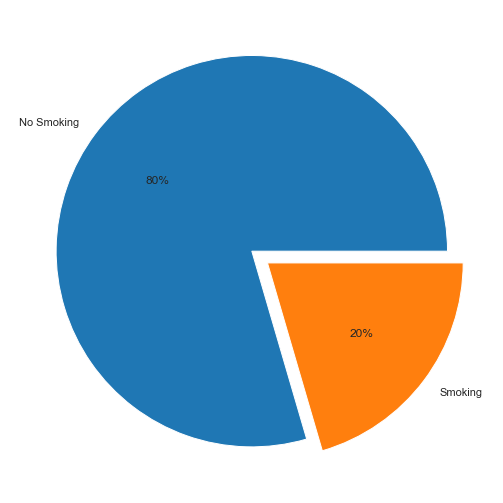

In [24]:
plt.figure(figsize=(12,9))
Label = ["No Smoking","Smoking"]
Smoke_valuecount = Data['smoker'].value_counts()*100
explode=(0,0.1)
plt.pie(Smoke_valuecount ,labels = Label ,colors=colors , autopct = '%2.0f%%' , explode = explode)
plt.show()

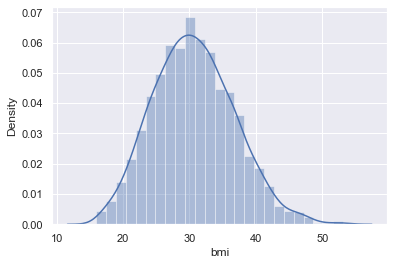

In [25]:
sns.distplot( a=Data["bmi"], hist=True, kde=True, rug=False )
plt.show()

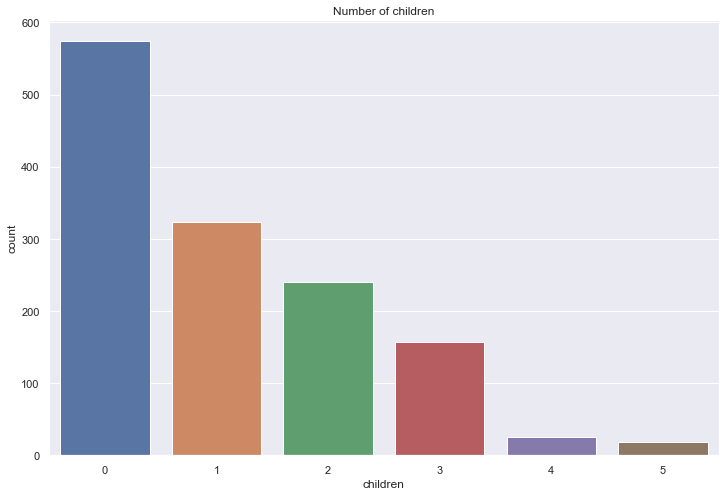

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(x='children',data = Data)
plt.title("Number of children")
plt.show()

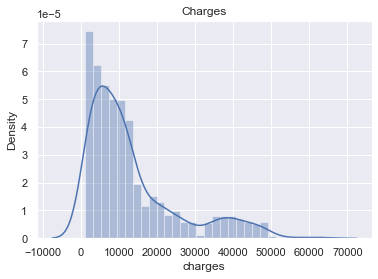

In [27]:
sns.set(style="darkgrid")
sns.distplot(Data['charges'])
plt.title('Charges')
plt.show()

Data is highly right skewed. we use log to transform 

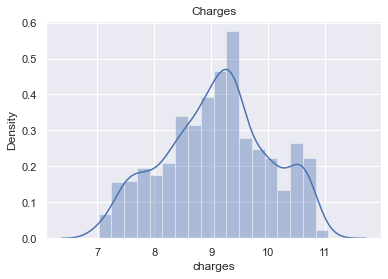

In [20]:
sns.set(style="darkgrid")
sns.distplot(np.log(Data['charges']))
plt.title('Charges')
plt.show()

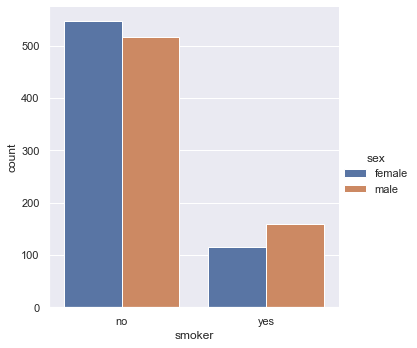

In [31]:
sns.catplot(x='smoker',data = Data,hue ="sex",kind='count')
plt.show()

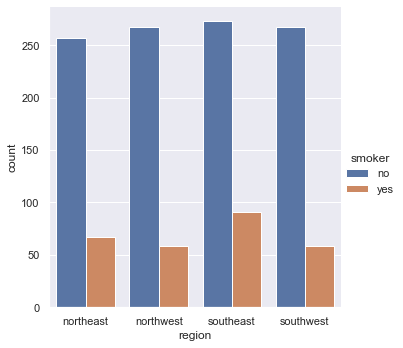

In [33]:
sns.catplot(x='region',data = Data,hue ="smoker",kind='count')
plt.show()

In [35]:
Data = pd.get_dummies(data = Data, drop_first =True)
Data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [36]:
Data['charges'] = np.log(Data['charges'])
Data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,0,1,0,0,1
1,18,33.770,1,7.453302,1,0,0,1,0
2,28,33.000,3,8.400538,1,0,0,1,0
3,33,22.705,0,9.998092,1,0,1,0,0
4,32,28.880,0,8.260197,1,0,1,0,0


In [37]:
X = Data.drop('charges',axis = 1)
Y = Data['charges']

In [39]:
X_train , X_test , y_train , y_test =train_test_split(X,Y,test_size=0.25)


In [40]:
linear_reg = LinearRegression()

In [41]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [46]:
Prediction = linear_reg.predict(X_test)
Prediction

array([ 9.15786678,  9.47460241,  8.749788  ,  9.86313359,  9.9569875 ,
        8.7873398 ,  8.93928686,  8.84009352,  8.63402921,  8.11096026,
        9.58958173,  8.85102242,  8.977797  ,  8.58581187,  9.11081821,
        8.37954854,  8.12660694,  8.79821067,  9.40068952,  9.23296273,
       10.79251491,  8.0732899 ,  9.46424447,  7.88845285,  8.40064528,
        9.33843978, 11.07285227,  9.65039758, 11.0596047 ,  9.09695262,
        8.51507272,  8.23994554,  9.13951139,  8.08053666,  8.10832125,
        9.11647982,  9.592171  ,  8.76541306,  8.55828183,  9.28059792,
        8.55953889,  8.17031259,  7.91591141, 11.09115388,  9.08826236,
        8.03145495,  9.27666966,  8.6148717 ,  8.68397201,  7.97636051,
        9.83813909,  9.50162112,  8.86543731,  9.02271683,  8.03327092,
        8.37275516, 10.5038395 ,  8.94297453,  9.54280356,  8.40888743,
       11.3310306 ,  7.95719416,  8.70426416,  8.63959675,  9.5728532 ,
       11.13182193,  7.82374296, 10.38497096, 10.22282651,  8.84

In [48]:
print("Linear Regression Score : ",r2_score(y_test,Prediction))

Linear Regression Score :  0.7350726112141556
